In [20]:
import os
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
with_mask_files = os.listdir("./data/with_mask")
without_mask_files = os.listdir("./data/without_mask")

print(f"With mask files: {len(with_mask_files)}")
print(f"Without mask files: {len(without_mask_files)}")
print(f"Total files: {len(without_mask_files) + len(with_mask_files)}")

With mask files: 3725
Without mask files: 3828
Total files: 7553


In [6]:
# data preprocessin
with_mask_labels = [1] * len(with_mask_files)
without_mask_labels = [0] * len(without_mask_files)
labels = with_mask_labels + without_mask_labels

In [9]:
data = []
for img in with_mask_files:
    img = Image.open(f'./data/with_mask/{img}')
    img = img.resize((128,128))
    img = img.convert("RGB")
    img = np.array(img)
    data.append(img)

for img in without_mask_files:
    img = Image.open(f'./data/without_mask/{img}')
    img = img.resize((128,128))
    img = img.convert('RGB')
    img = np.array(img)
    data.append(img)

/Users/bencetoth/Documents/Development/Projects/neural/.venv/lib/python3.12/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
x = np.array(data)
y = np.array(labels)

Xtr, Xte, Ytr, Yte = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
Xtr = Xtr / 255
Xte = Xte / 255

(6042, 128, 128, 3)

In [22]:
# building our model
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(128,128,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='sigmoid')
])

model.compile(optimizer= "adam", loss="sparse_categorical_crossentropy", metrics=['acc'])

/Users/bencetoth/Documents/Development/Projects/neural/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
history = model.fit(Xtr, Ytr, validation_split=0.1, epochs=5, verbose=1)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 36s 201ms/step - acc: 0.6550 - loss: 0.7125 - val_acc: 0.8612 - val_loss: 0.3290
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - acc: 0.8853 - loss: 0.2791 - val_acc: 0.8975 - val_loss: 0.2137
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 33s 194ms/step - acc: 0.9282 - loss: 0.1875 - val_acc: 0.9157 - val_loss: 0.1884
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 33s 195ms/step - acc: 0.9499 - loss: 0.1321 - val_acc: 0.9289 - val_loss: 0.1720
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 37s 216ms/step - acc: 0.9625 - loss: 0.1075 - val_acc: 0.9355 - val_loss: 0.1746


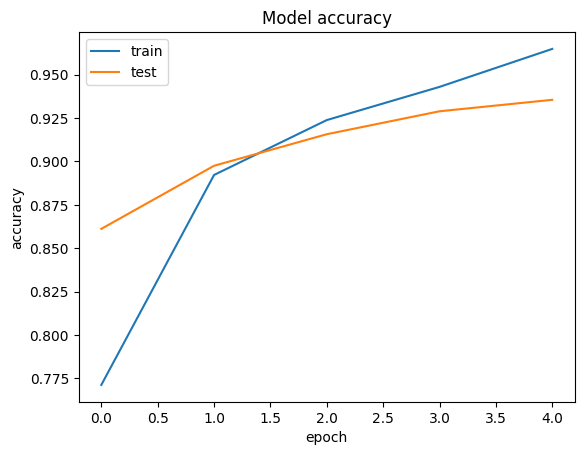

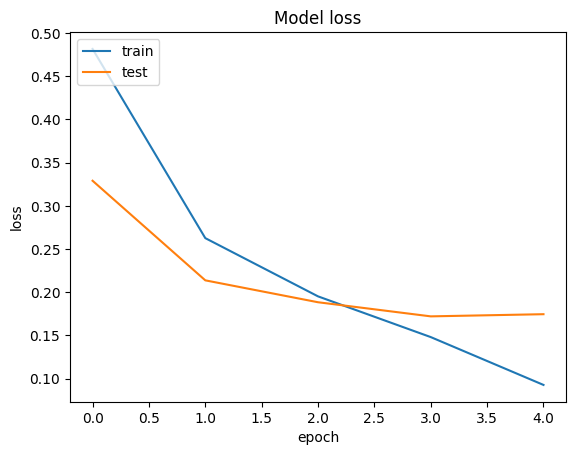

In [25]:
# Charts
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc="upper left")
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train', 'test'], loc="upper left")
plt.show()

In [27]:
model.save('model.h5')